## RRegression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Let's hit the ground running by importing the data and viewing the first few rows.


In [1]:
# Load the core tidyverse and tidymodels in your current R session
suppressPackageStartupMessages({
 library(tidyverse)
 library(tidymodels)
})

# Read the csv file into a tibble
estate_data <- read_csv(file = "https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/real_estate.csv", 
show_col_types = FALSE)

# Print the first 10 rows of the data
estate_data %>%
 slice_head(n = 10)


transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1
2012.667,34.5,623.47310,7,24.97933,121.5364,40.3
2013.417,20.3,287.60250,6,24.98042,121.5423,46.7
2013.500,31.7,5512.03800,1,24.95095,121.4846,18.8


The data consists of the following variables:

-   **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

-   **house_age** - the house age (in years)

-   **transit_distance** - the distance to the nearest light rail station (in meters)

-   **local_convenience_stores** - the number of convenience stores within walking distance

-   **latitude** - the geographic coordinate, latitude

-   **longitude** - the geographic coordinate, longitude

-   **price_per_unit** house price of unit area (3.3 square meters)

Your challenge is to explore and prepare the data, identify predictive features that will help predict the `price_per_unit` label, and train a regression model that achieves the lowest *Root Mean Square Error* (RMSE) you can achieve (which must be less than *7*) when evaluated against a test subset of data.

### View the label distribution

Let's start our analysis of the data by examining a few key descriptive statistics. We can use the `summarytools::descr()` function to neatly and quickly summarize the numeric features as well as the *rentals* label column.


In [ ]:
# Load summary tools library
library(summarytools)

# Obtain summary stats for feature and label columns
estate_data %>%
  # Summary stats
  descr(order = "preserve",
        stats = c("mean", "sd", "min", "q1", "med", "q3", "max"),
        round.digits = 6)


The statistics reveal some information about the distribution of the data in each of the numeric fields, including the number of observations (there are 414 records), the mean, standard deviation, minimum and maximum values, and the quantile values (the threshold values for 25%, 50% - which is also the median, and 75% of the data).

From this, we can see that the mean number of price per unit is around 38. There's a comparatively *small standard deviation*, indicating *not much variance* in the prices per unit.

We might get a clearer idea of the distribution of price values by visualizing the data.


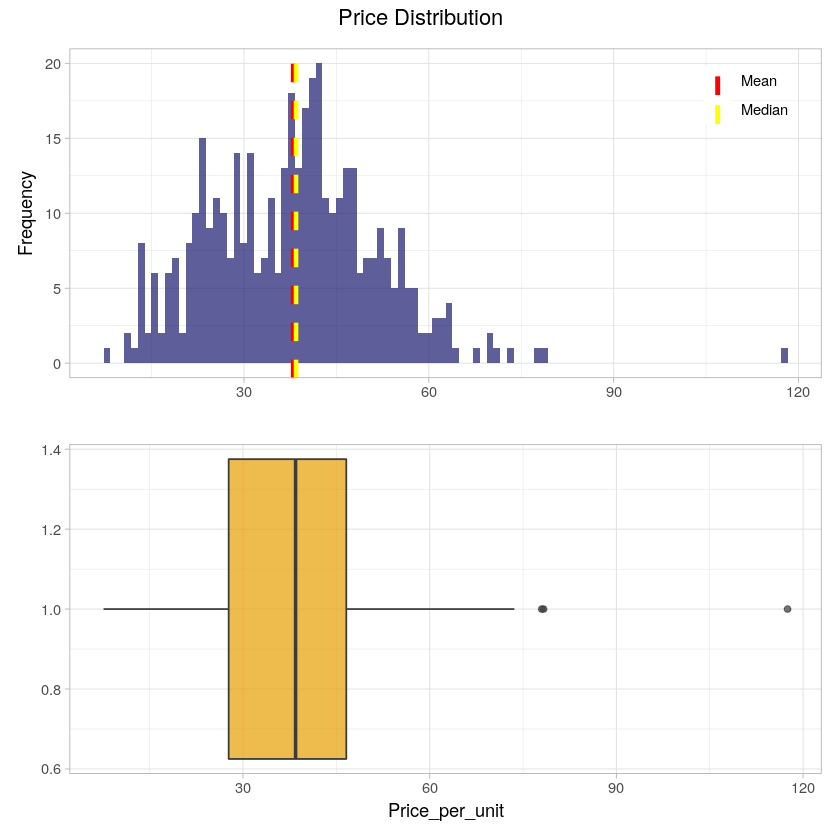

In [2]:
library(patchwork)

# Plot a histogram
theme_set(theme_light())

hist_plt <- estate_data %>%
  ggplot(mapping = aes(x = price_per_unit)) +
  geom_histogram(bins = 100, fill = "midnightblue", alpha = 0.7) +

  # Add lines for mean and median
  geom_vline(aes(xintercept = mean(price_per_unit), color = "Mean"),
 linetype = "dashed", size = 1.3) +
  geom_vline(aes(xintercept = median(price_per_unit), color = "Median"),
 linetype = "dashed", size = 1.3) +
  xlab("") +
  ylab("Frequency") +
  scale_color_manual(name = "", values = c(Mean = "red", Median = "yellow")) +
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank())

# Plot a box plot
box_plt <- estate_data %>%
  ggplot(aes(x = price_per_unit, y = 1)) +
  geom_boxplot(fill = "#E69F00", color = "gray23", alpha = 0.7) +
    # Add titles and labels
  xlab("Price_per_unit") +
  ylab("")


# Combine plots using patchwork syntax
(hist_plt / box_plt) +
  plot_annotation(title = "Price Distribution",
                  theme = theme(
                    plot.title = element_text(hjust = 0.5)))


What can we observe from the boxplot? Yes, outliers.

### Remove outliers

We are now set to begin writing some code ourselves 🙂. Let's begin by dealing with outliers. An outlier is a data point that differs significantly from other observations.

**Question 1.**

Starting with the `estate_data` dataset, `filter` to create a subset that contains observations where `price_per_unit` is less than *70*.

Fill in the placeholder `....` with the right code.

In [ ]:
# Narrow down to observations whose price_per_unit is less than 70
estate_data <- estate_data %>%
  ....


Test your answer:


In [ ]:
. <- ottr::check("tests/Question 1.R")


Now let's take a look at the distribution without the outliers.



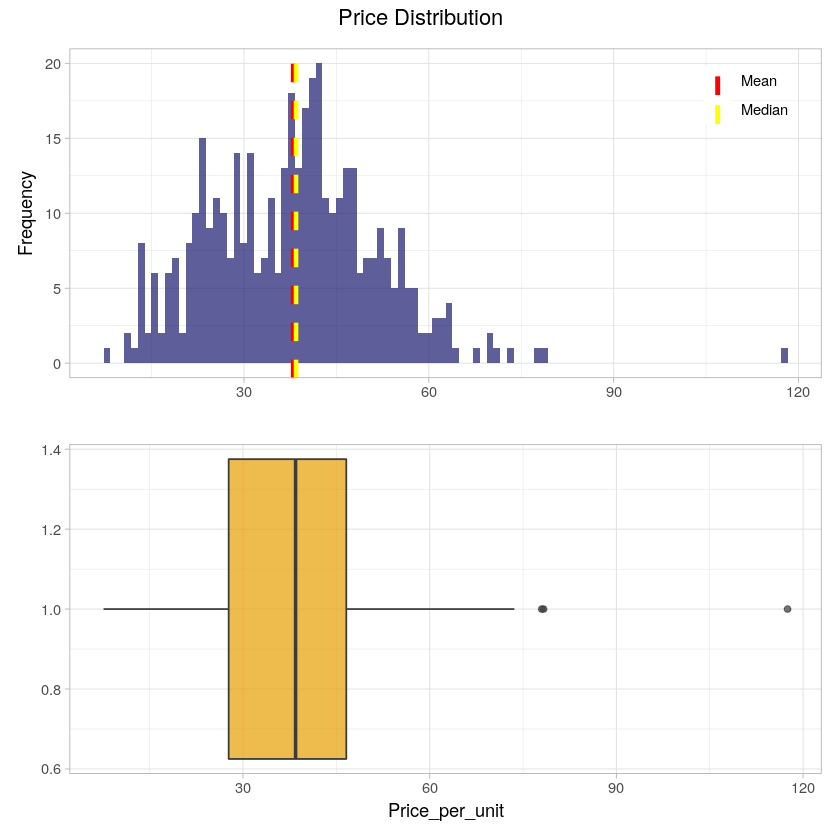

In [3]:
# Plot a histogram
theme_set(theme_light())
hist_plt <- estate_data %>%
  ggplot(mapping = aes(x = price_per_unit)) + 
  geom_histogram(bins = 100, fill = "midnightblue", alpha = 0.7) +

  # Add lines for mean and median
  geom_vline(aes(xintercept = mean(price_per_unit), color = "Mean"),
 linetype = "dashed", size = 1.3) +
  geom_vline(aes(xintercept = median(price_per_unit), color = "Median"),
 linetype = "dashed", size = 1.3) +
  xlab("") +
  ylab("Frequency") +
  scale_color_manual(name = "", values = c(Mean = "red", Median = "yellow")) +
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank())

# Plot a box plot
box_plt <- estate_data %>%
  ggplot(aes(x = price_per_unit, y = 1)) +
  geom_boxplot(fill = "#E69F00", color = "gray23", alpha = 0.7) +
    # Add titles and labels
  xlab("Price_per_unit") +
  ylab("")


# Combine plots using patchwork syntax
(hist_plt / box_plt) +
  plot_annotation(title = "Price Distribution",
                  theme = theme(
                    plot.title = element_text(hjust = 0.5)))


Much better 🤩! What can we say about the distribution of the price?

### View numeric correlations

We can now start to look for relationships between the *features* and the *label* we want to be able to predict.

The *correlation* statistic, *r*, is a value between -1 and 1 that indicates the strength of a linear relationship.

For numeric feature and label columns, we can create scatter plots that show the intersection of the feature and label values.

**Question 2.**

Starting with the `estate_data` dataset, in a piped sequence:

- `pivot_longer` the data (increase the number of rows and decrease the number of columns) such that all the existing column names except price_per_unit, now fall under a new column name called `features` and their corresponding values under a new column name `values`

-   group the data by `features`

-   add a new column `corr_coef` which calculates the correlation between `values` and `price_per_unit` (hint: the function used for calculating correlation in R is `cor()`)

Fill in the placeholder `....` with the right code.

In [4]:
# Pivot numeric features to a long format
numeric_features_long <- estate_data %>%
  pivot_....(!price_per_unit, names_to = "....", values_to = "....") %>%
  # Group by features
  ....(features) %>%
  # Calculate correlation coefficient between values and price_per_unit
  mutate(corr_coef = ....) %>%

  # Modifies the feature column to also include corr_coef
  mutate(features = paste(features, "vs price, r = ",
 round(corr_coef, 2), sep = "")) %>%
  ungroup()

# Print the first few rows of the data
numeric_features_long %>%
  slice_head(n = 10)


ERROR: Error in ....(., features): could not find function "...."


Test your answer:


In [ ]:
. <- ottr::check("tests/Question 2.R")


Fantastic! Now let's use a scatter plot to investigate whether there is any linear relationship between our predictors and outcome variables.



In [5]:
# Plot a scatter plot for each feature
numeric_features_long %>%
  ggplot(aes(x = values, y = price_per_unit, color = features)) +
  geom_point(alpha = 0.7, show.legend = F) +
  facet_wrap(~ features, scales = "free") +
  paletteer::scale_color_paletteer_d("ggthemes::excel_Parallax")


ERROR: Error in ggplot(., aes(x = values, y = price_per_unit, color = features)): object 'numeric_features_long' not found


Take a moment and go through the scatter plot. How does the correlation between these features and the price vary?

### View categorical features

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of rental counts for each category.

`Transaction_date` and `local_convenience_stores` seem to be discrete values - so might work better if treated as categorical features. Let' get right into it.

**Question 3.**

Starting with the `estate_data` dataset, in a piped sequence:

-   only keep columns `transaction_date`, `local_convenience_stores` and `price_per_unit`

-   encode columns `transaction_date` and `local_convenience_stores` as categorical (factor)

-   `pivot_longer` the data (increase the number of rows and decrease the number of columns) such that all the existing column names except price_per_unit now fall under a new column name called `features` and their corresponding values under a new column name `values`

Fill in the placeholder `....` with the right code.

In [ ]:
# Pivot categorical features to a long format
cat_features_long <- estate_data %>%
  ....(transaction_date, ...., ....) %>%
  # Encode transaction_date & local_convenience_stores features
  # from numeric to categorical
  mutate(....) %>%
  pivot_longer(....)

# Print some observations
cat_features_long %>%
  slice_head(n = 10)


Test your answer:


In [ ]:
. <- ottr::check("tests/Question 3.R")


Perfect! Now, for our categorical features, boxplots can be a great way of visualising how the price per unit varies within the levels of the categorical feature.



In [ ]:
# Plot a box plot for each feature
cat_features_long %>%
  ggplot() +
  geom_boxplot(aes(x = values, y = price_per_unit, fill = features),
 alpha = 0.7, show.legend = F) +
  facet_wrap(~ features, scales = "free") +
  scale_fill_viridis_d() +
  theme(panel.grid = element_blank(),
        axis.text.x = element_text(angle = 90))


Take a moment and interpret the graphics. How does the price vary with these features?

## Split the data into training and test sets.

Now that we've explored the data, it's time to use it to train a regression model that uses the features we've identified as *potentially predictive* to predict the `price_per_unit` label.

`Transaction_date` doesn't seem to be very predictive, so we'll omit it.

Let's begin by splitting the data set such that some goes to training and some goes for validation. This enables us to evaluate how well the model performs in order to get a better estimate of how your models will perform on new data.

**Question 4.**

In this section:

-   Make a split specification of `estate_data` such that *70%* goes to training and the rest goes to testing. Save this to a variable name `estate_split`

-   Extract the training and testing sets from `estate_split` and save them in `estate_train` and `estate_test` variable names respectively.

Fill in the placeholder `....` with the right code.

In [ ]:
# Set seed to ensure reproducibility and consistency of outputs
set.seed(2056)

# Load the tidymodels package
library(tidymodels)

# Split 70% of the data for training and the rest for tesing
estate_split <- estate_data %>%
  initial_split(....)

# Extract the train and test data in each split
estate_train <- ....(estate_split)
estate_test <- ....(estate_split)

# Print the number of observations in each split
cat("Training Set", nrow(estate_train), "rows",
    "\nTest Set", nrow(estate_test), "rows")


Test your answer:


In [ ]:
. <- ottr::check("tests/Question 4.R")


Great progress 💪! Now let's train some models.

## Train a regression model

### Preprocess data using recipes

Often before fitting a model, we may want to reformat the predictor values to make them easier for a model to use effectively. This includes transformations and encodings of the data to best represent their important characteristics. In R,this is done using a `recipe`.

A recipe is an object that defines a series of steps for data processing.

**Question 5.**

In this section, specify a recipe, `estate_recipe`, that will:

-   Remove the `transaction_date` feature

-   Transform `local_convenience_stores` feature into categorical (factor)

-   Center and scale all numeric predictors

Fill in the placeholder `....` with the right code.

In [ ]:
# Create a preprocessing recipe
estate_recipe <- ....(price_per_unit ~ ., data = estate_train) %>%
  # Specify the removal of transaction_date
  step_rm(....) %>%
  # Specify the encoding of local_convenience_stores as categorical
  step_mutate(
    local_convenience_stores = ....) %>%
  # Specify the normalization of numeric features
  ....(all_numeric_predictors())
 
# Print recipe
estate_recipe


Test your answer:


In [ ]:
. <- ottr::check("tests/Question 5.R")


Fantastic! We have the data processing in order. Now, let's make a model specification. In this solution, we'll try out a random forest model which applies an averaging function to multiple decision tree models for a better overall model.

**Question 6.**

Create a random forest model specification, `rf_spec`, which uses the `randomForest` package as its engine and then set the mode to `regression`.

Fill in the placeholder `....` with the right code.

In [ ]:
# Build a random forest model specification
rf_spec <- rand_forest() %>%
  # Specify engine
  .... %>%
  # Specify mode
  set_mode("....")


Test your answer:


In [ ]:
. <- ottr::check("tests/Question 6.R")


### Create a modeling workflow

The *workflows* package allows the user to bind modeling and preprocessing objects together. You can then fit the entire workflow to the data, so that the model encapsulates all of the preprocessing steps as well as the algorithm.

**Question 7.**

Components of a `workflow()` go together like LEGO blocks. In this section, create a workflow container and then add the preprocessing information from our recipe and then add the model specification to be trained.

Fill in the placeholder `....` with the right code.

In [ ]:
# Create a workflow that bundles a recipe and model specification
rf_workflow <- workflow() %>%
  # Add a recipe
  add_recipe(....) %>%
  # Add a model specification
  ....
# Print workflow
rf_workflow


Test your answer:


In [ ]:
. <- ottr::check("tests/Question 7.R")


Now that we have everything (recipe + model specification) wrapped together nicely in a workflow, we are ready to train a model. Workflows have a `fit()` method that can be used to train a model.



In [ ]:
# For reproducibility
set.seed(2056)

# Train a random forest model
rf_workflow_fit <- rf_workflow %>%
  fit(data = estate_train)

# Print out the fitted workflow
rf_workflow_fit


Excellent! So we now have a trained random forest model; but is it any good? Let's evaluate its performance! We'll do this by making predictions on the `test data` and then evaluate some performance metrics based on the actual outcomes.

**Question 8.**

-   We'll evaluate the model performance based on the *rmse* and *rsq* metrics. Use the `metric_set()` function to combine these metric functions together into a new function, `eval_metrics`, that calculates all of them at once.

-   Generate predictions for the test data and then bind them to the test set. Rename the column containing predictions from `.pred` to `predictions`.

Fill in the placeholder `....` with the right code.

In [ ]:
# Create a metric set
eval_metrics <- ....(rmse, ....)


# Make and bind predictions to test data
results <- rf_workflow_fit %>%
  ....


Test your answer:


In [ ]:
. <- ottr::check("tests/Question 8.R")


Awesome work! You have just used your trained model to make predictions on the test set.

How well did the model predict the prices per unit? Let's find out by looking at the metrics.


In [ ]:
# Evaluate the model
rf_metrics <- eval_metrics(data = results,
                           truth = price_per_unit,
                           estimate = predictions)


# Plot predicted vs actual
rf_plt <- results %>%
  ggplot(mapping = aes(x = price_per_unit, y = predictions)) +
  geom_point(color = "darkorchid", size = 1.6) +
  # overlay regression line
  geom_smooth(method = "lm", color = "black", se = F) +
  ggtitle("Price per unit predictions") +
  xlab("Actual Labels") +
  ylab("Predicted Labels") +
  theme(plot.title = element_text(hjust = 0.5))

# Return evaluations
list(metrics = rf_metrics, evaluation_plot = rf_plt)


How do you think the model performed? What do the values for `rsq` and `rmse` tell you? Please refer to the corresponding module for this notebook if you may need help answering these questions.

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| **transaction_date** | **house_age** | **transit_distance** | **local_convenience_stores** | **latitude** | **longitude** |
|----------------------|---------------|----------------------|------------------------------|--------------|---------------|
| 2013.167             | 16.2          | 289.3248             | 5                            | 24.98203     | 121.54348     |
| 2013.000             | 13.6          | 4082.015             | 0                            | 24.94155     | 121.50381     |



In [ ]:
library(here)
# Save trained workflow
saveRDS(rf_workflow_fit, "rf_price_model.rds")


In this way, we can load it whenever we need it, and use it to predict labels for new data. This is often called *scoring* or *inferencing*.



In [ ]:
# Create a tibble for the new real estate samples
new_data <- tibble(
  transaction_date = c(2013.167, 2013.000),
  house_age = c(16.2, 13.6),
  transit_distance = c(289.3248, 4082.015),
  local_convenience_stores = c(5, 0),
  latitude = c(24.98203, 24.94155),
  longitude = c(121.54348, 121.50381))

# Print out new data
new_data


Now that we have our data, let's load the saved model and make predictions.



In [ ]:
# Load the model into the current R session
loaded_model <- readRDS("rf_price_model.rds")

# Make predictions
predictions <- loaded_model %>%
  augment(new_data = new_data)

predictions


Congratulations for completing this challenge! In this notebook, you:

-   Explored the data set to understand the relationships between the predictors and outcomes
-   Preprocessed the data using recipes to make them easier for a model to use effectively.
-   Made a random forest model specification.
-   Bundles a recipe and model specification into a workflow.
-   Trained a model.
-   Made predictions on test set and evaluated the model performance.
-   Saved the model, loaded it and then used it to predict labels for new data.

Fantastic job for coming this far 👏! Feeling adventurous? Then, be sure to try out other regression models and tune some hyperparameters while at it.

See you in our next module as we explore the realm of *classification* models!

Happy Learning,

[Eric](https://twitter.com/ericntay), Gold Microsoft Learn Student Ambassador.
